<a href="https://colab.research.google.com/github/golf41101/Suchet/blob/master/ComparePerformance_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Compare performance of predict sales on Black Friday datasets from kaggle by scaling data, ont-hot encoder for non-order category ,original data

# Data Exploration

1.	หาค่า frequency,correlations ของแต่ละตัวแปร
2.	ดูความถี่ของแต่ละตัวแปร : Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years


# Methodology / Approach

1.	Linear Regression: โมเดลถดถอยอย่างง่ายใช้สำหรับ คาดการณ์ข้อมูลตัวแปรที่เป็นตัวเลข

### 2-3 ใช้เพื่อลดการ overfitting ของ model
2.	Ridge Regression: โมเดลถดถอยที่มีจุดเด่นในการลดความสำคัญของตัวแปร แต่จะไม่กำจัดออกไป จะใช้ได้ดีกว่า Lasso ในกรณีที่ ตัวแปรส่วนใหญ่ใน model are useful
3.	Lasso Regression: โมเดลถดถอยที่มีลักษณะเด่นคือจะกำจัดตัวแปรที่ไม่มีประโยชน์ออกไปจาก model
4.	Decision Tree Regressor: โมเดลต้นไม้โดยจะทำการแบ่งข้อมูลออกมาเป็นส่วนๆ โดยแบ่งออกเป็นแต่ละ node โดย node ที่แบ่งข้อมูลได้มากที่สุดจะกลายเป็น root node และแตกย่อยเป็น leaf node 
5.	Random Forest Regressor: เป็นการสร้างโมเดล Decision Tree หลายๆ ตัวด้วย training data ที่มีข้อมูลและตัวแปรที่แตกต่างกัน และรวมผลการทำนายด้วยวิธีการโหวต








In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
#mount you GoogleDrive to "drive" folder
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [3]:
#set path
path ="/drive/MyDrive/Data_For_Project/"

In [4]:
df = pd.read_csv(path + "train.csv")

In [5]:
# มี missing value 2 ตัวแปร : Product_Category_2,Product_Category_3
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
# explordata เพื่อดูการกระจายของข้อมูล categories 

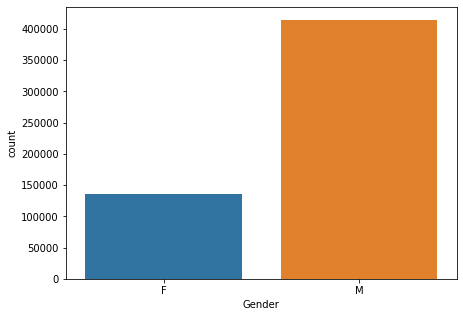

In [8]:
ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(x="Gender", data=df)

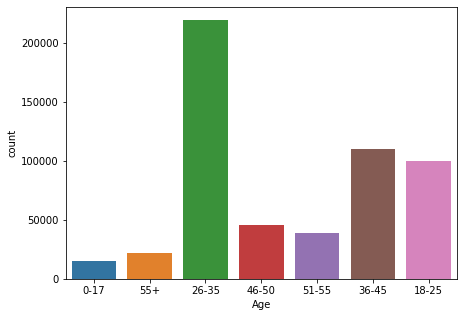

In [9]:
ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(x="Age", data=df)

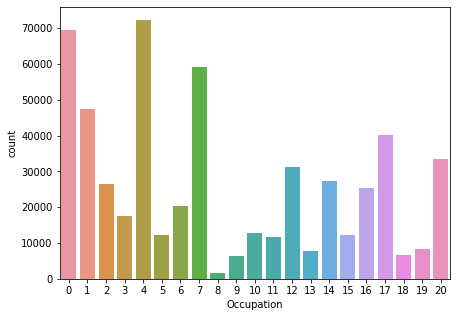

In [10]:
ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(x="Occupation", data=df)

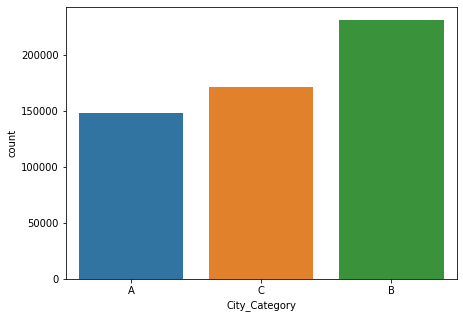

In [11]:
ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(x="City_Category", data=df)

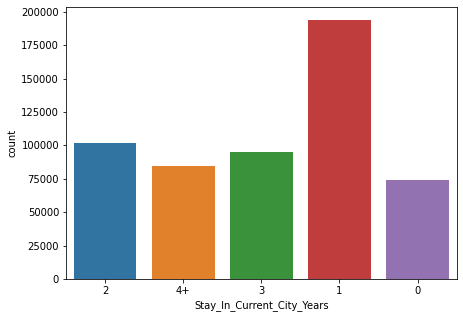

In [12]:
ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(x="Stay_In_Current_City_Years", data=df)

In [13]:
# ทำการ labelencoding กับตัวแปร categories
le = preprocessing.LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])
df['Gender'] = le.fit_transform(df['Gender'])
df['City_Category'] = le.fit_transform(df['City_Category'])
df['Stay_In_Current_City_Years'] = le.fit_transform(df['Stay_In_Current_City_Years'])

In [14]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,2,4,0,8,NaN,NaN,7969


In [15]:
# filling missing data with 0 assume ว่าการสั่งซื้อนั้นไม่เข้าหมวด Product_Category ดังกล่าว
df['Product_Category_2'].fillna(0,inplace=True)
df['Product_Category_3'].fillna(0,inplace=True)

In [16]:
# drop product_ID เพราะไม่ใช่ตัวแปร
df = df.drop(columns=['Product_ID'],axis=1)

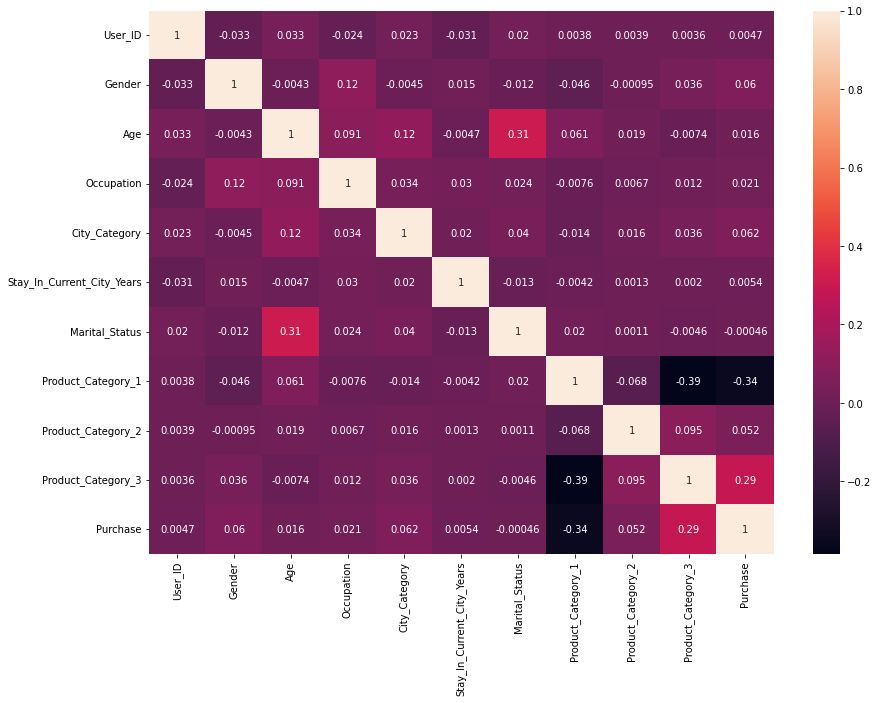

In [17]:
ax = plt.subplots(figsize=(14, 10))
ax = sns.heatmap(df.corr(),annot=True)

เตรียมนำข้อมูลเข้า model ต่างๆ

In [18]:
df1 = df.copy()

In [19]:
df1.drop(columns='User_ID',inplace=True)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 42.0 MB


skewness  0.6001400037087128
kurtosis  -0.3383775655851702


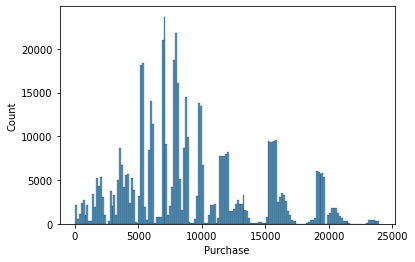

In [21]:
# plot target variable
print("skewness ",df1['Purchase'].skew(axis=0))# ดูความเบ้ค่าบวก คือ เบ้ขวา
print("kurtosis ",df1['Purchase'].kurt(axis=0))# ดูความโด่งของข้อมูล
sns.histplot(x='Purchase',data=df1)

In [22]:
X = df1.drop("Purchase",axis=1)
y = df1["Purchase"]

In [23]:
df1.shape

(550068, 10)

In [24]:
from sklearn.model_selection import train_test_split
# ใช้ค่า default ของ test size =0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [25]:
print(f'training features: {X_train.shape}')
print(f'training label: {y_train.shape}')
print(f'test features: {X_test.shape}')
print(f'test label: {y_test.shape}')

training features: (412551, 9)
training label: (412551,)
test features: (137517, 9)
test label: (137517,)


## **Original Model**

In [26]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# linear regression
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)
y_pred_reg = model_reg.predict(X_test)
mse_reg = mean_squared_error(y_test, y_pred_reg)
print('MSE of Linear Regression:', mse_reg)

# ridge regression
model_rid = Ridge()
model_rid.fit(X_train, y_train)
y_pred_rid = model_rid.predict(X_test)
mse_rid = mean_squared_error(y_test, y_pred_rid)
print('MSE of Ridge Regression:', mse_rid)

# lasso regression
model_las = linear_model.Lasso()
model_las.fit(X_train, y_train)
y_pred_las = model_las.predict(X_test)
mse_las = mean_squared_error(y_test, y_pred_las)
print('MSE of Lasso Regression:', mse_las)

# Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred_dtr = regressor.predict(X_test)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
print('MSE of Decision Tree Regressor:', mse_dtr)

# Random Forest Regressor
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
y_pred_regr = regr.predict(X_test)
mse_regr = mean_squared_error(y_test, y_pred_regr)
print('MSE of Random Forest Regressor:', mse_regr)

MSE of Linear Regression: 21355490.495925907
MSE of Ridge Regression: 21355490.48611554
MSE of Lasso Regression: 21355499.144180156
MSE of Decision Tree Regressor: 11343358.05614451
MSE of Random Forest Regressor: 9380980.91795687


                            Coefficients
Gender                        473.642024
City_Category                 321.119830
Product_Category_3            143.854301
Age                           104.769568
Product_Category_2             12.866324
Stay_In_Current_City_Years      7.194922
Occupation                      5.630790
Marital_Status                -48.644005
Product_Category_1           -348.807911


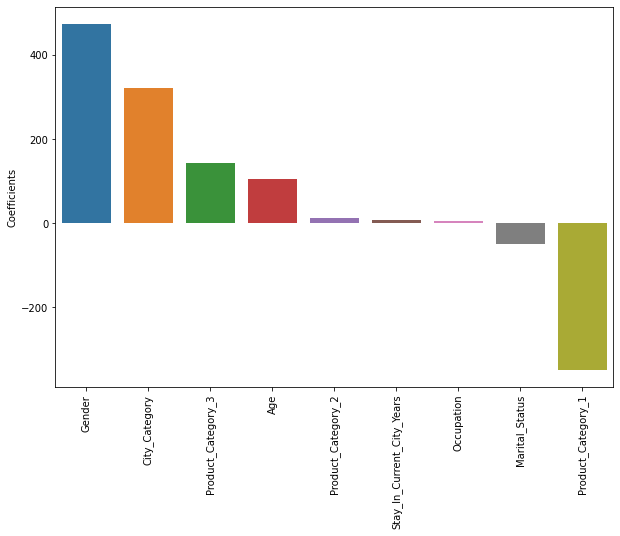

In [27]:
# Coefficients of linear regression

cdf_reg = pd.DataFrame(model_reg.coef_, X.columns, columns=['Coefficients'])
cdf_reg = cdf_reg.sort_values(by='Coefficients',ascending=False)
print(cdf_reg)
ax = plt.subplots(figsize=(10, 7))
x = cdf_reg.index
ax = sns.barplot(x=x,y='Coefficients', data=cdf_reg)
plt.xticks(rotation=90)
plt.show()

                            Coefficients
Gender                        473.635746
City_Category                 321.118471
Product_Category_3            143.854322
Age                           104.769414
Product_Category_2             12.866325
Stay_In_Current_City_Years      7.194954
Occupation                      5.630845
Marital_Status                -48.643395
Product_Category_1           -348.807877


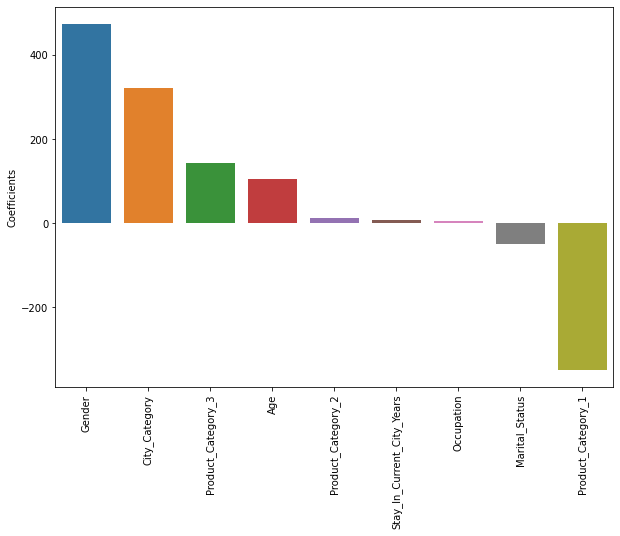

In [28]:
# Coefficients of Ridge regression

cdf_rid = pd.DataFrame(model_rid.coef_, X.columns, columns=['Coefficients'])
cdf_rid = cdf_rid.sort_values(by='Coefficients',ascending=False)
print(cdf_rid)
ax = plt.subplots(figsize=(10, 7))
x = cdf_rid.index
ax = sns.barplot(x=x,y='Coefficients', data=cdf_rid)
plt.xticks(rotation=90)
plt.show()

                            Coefficients
Gender                        468.276530
City_Category                 319.492744
Product_Category_3            143.861991
Age                           103.733004
Product_Category_2             12.848310
Stay_In_Current_City_Years      6.655137
Occupation                      5.669265
Marital_Status                -43.617377
Product_Category_1           -348.763702


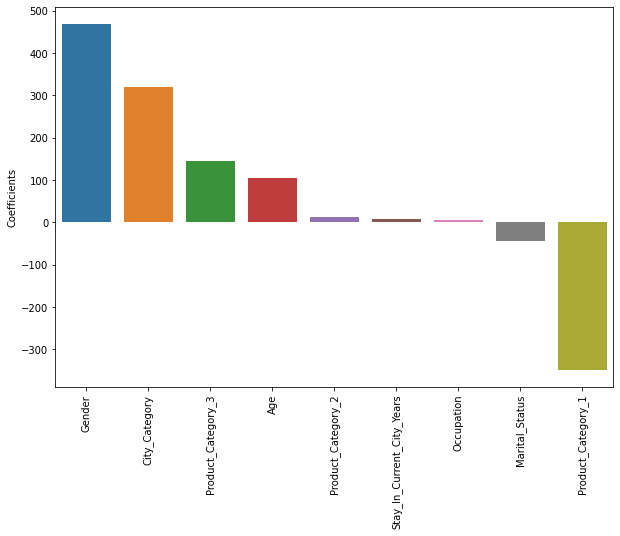

In [29]:
# Coefficients of lasso regression

cdf_las = pd.DataFrame(model_las.coef_, X.columns, columns=['Coefficients'])
cdf_las = cdf_las.sort_values(by='Coefficients',ascending=False)
print(cdf_las)
ax = plt.subplots(figsize=(10, 7))
x = cdf_las.index
ax = sns.barplot(x=x,y='Coefficients', data=cdf_las)
plt.xticks(rotation=90)
plt.show()

                            importances
Product_Category_1             0.792500
Occupation                     0.054854
Stay_In_Current_City_Years     0.039062
Age                            0.032977
Product_Category_2             0.025398
Product_Category_3             0.016486
Marital_Status                 0.014526
City_Category                  0.013042
Gender                         0.011155


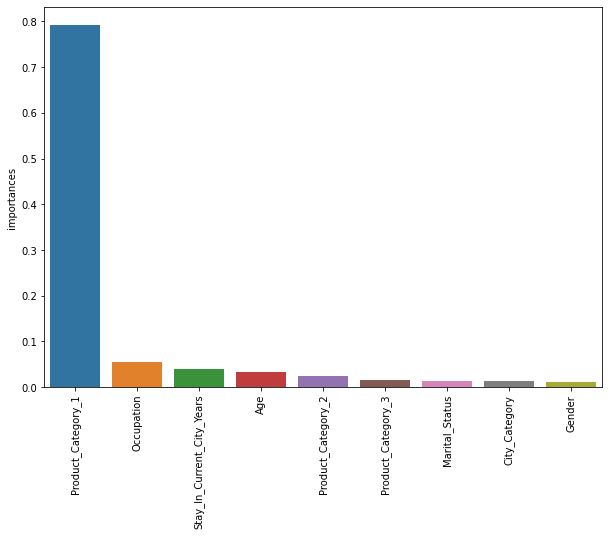

In [30]:
# Coefficients of Decision Tree Regressor

cdf_regressor = pd.DataFrame(regressor.feature_importances_, X.columns, columns=['importances'])
cdf_regressor = cdf_regressor.sort_values(by='importances',ascending=False)
print(cdf_regressor)
ax = plt.subplots(figsize=(10, 7))
x = cdf_regressor.index
ax = sns.barplot(x=x,y='importances', data=cdf_regressor)
plt.xticks(rotation=90)
plt.show()

                            importances
Product_Category_1             0.764112
Occupation                     0.063366
Stay_In_Current_City_Years     0.044060
Age                            0.038678
Product_Category_2             0.027270
Product_Category_3             0.017897
Marital_Status                 0.016704
City_Category                  0.014843
Gender                         0.013069


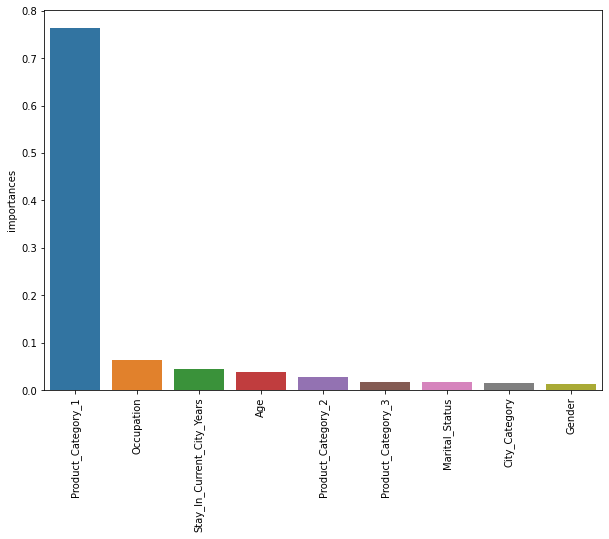

In [31]:
# Coefficients of Random Forest Regressor

cdf_regr = pd.DataFrame(regr.feature_importances_, X.columns, columns=['importances'])
cdf_regr= cdf_regr.sort_values(by='importances',ascending=False)
print(cdf_regr)
ax = plt.subplots(figsize=(10, 7))
x = cdf_regr.index
ax = sns.barplot(x=x,y='importances', data=cdf_regr)
plt.xticks(rotation=90)
plt.show()

In [32]:
# create list of model
list_mod = [model_reg,model_rid,model_las,regressor,regr]

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
#5 fold cross-validation 
for i in list_mod:
  score_mse = cross_val_score(i, X, y,scoring='neg_mean_squared_error',cv=5)
  score_mse.tolist()
  print(i,"%0.4f accuracy with a standard deviation of %0.4f" % (score_mse.mean(), score_mse.std()))

LinearRegression() -21421784.4777 accuracy with a standard deviation of 78579.8286
Ridge() -21421784.4693 accuracy with a standard deviation of 78579.8239
Lasso() -21421802.6517 accuracy with a standard deviation of 78575.1712
DecisionTreeRegressor(random_state=0) -11154187.6703 accuracy with a standard deviation of 29086.8365
RandomForestRegressor(random_state=0) -9316216.0698 accuracy with a standard deviation of 29372.4039


In [35]:
#5 fold cross-validation R2
for i in list_mod:
  score_mse = cross_val_score(i, X, y,scoring='r2',cv=5)
  score_mse.tolist()
  print(i,"%0.4f accuracy with a standard deviation of %0.4f" % (score_mse.mean(), score_mse.std()))

LinearRegression() 0.1494 accuracy with a standard deviation of 0.0304
Ridge() 0.1494 accuracy with a standard deviation of 0.0304
Lasso() 0.1494 accuracy with a standard deviation of 0.0304
DecisionTreeRegressor(random_state=0) 0.5571 accuracy with a standard deviation of 0.0150
RandomForestRegressor(random_state=0) 0.6301 accuracy with a standard deviation of 0.0118


## **Scaling Data**

1.   โดยการทำการใช้ one-hot encoding กับตัวแปร City_Category แทนการใช้ label encoding
2.   โดยการทำการ tranform data ให้อยู่ใน scale เดียวกันโดยใช้ MinMaxScaler

โดยทำเป็น 2 กรณี


1.   tranform data MinMaxScaler โดยประเมินประสิทธิภาพด้วย mse จาก model ต่างๆ
2.   one-hot encoding กับตัวแปร City_Category ส่วนตัวแปร input อื่นใช้การ label endoing เช่นเดิม และ มีการ tranform data MinMaxScaler โดยประเมินประสิทธิภาพด้วย mse จาก model ต่างๆ





In [36]:
df2 = df1.copy()

In [37]:
df2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0.0,0.0,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,0.0,0.0,1422
3,0,0,10,0,2,0,12,14.0,0.0,1057
4,1,6,16,2,4,0,8,0.0,0.0,7969


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 42.0 MB


In [39]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [40]:
df2 = df2.astype('float64')
# normalize features
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [41]:
X_numpy = X.to_numpy()
y_numpy = y.to_numpy()

In [42]:
scaler_x = scaler.fit(X_numpy.reshape(-1,9))
scaler_y = scaler.fit(y_numpy.reshape(-1,1))

In [43]:
scaled_test_x = scaler_x.fit_transform(X_numpy.reshape(-1,9))
scaled_test_y = scaler_y.fit_transform(y_numpy.reshape(-1,1))

In [44]:
scaled_data = np.concatenate((scaled_test_x,scaled_test_y),axis=1)

In [45]:
df_scaled_data = pd.DataFrame(scaled_data, columns = df1.columns)

In [46]:
df_scaled_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.0,0.0,0.5,0.0,0.5,0.0,0.105263,0.000000,0.000000,0.348992
1,0.0,0.0,0.5,0.0,0.5,0.0,0.000000,0.333333,0.777778,0.634181
2,0.0,0.0,0.5,0.0,0.5,0.0,0.578947,0.000000,0.000000,0.058875
3,0.0,0.0,0.5,0.0,0.5,0.0,0.578947,0.777778,0.000000,0.043634
4,1.0,1.0,0.8,1.0,1.0,0.0,0.368421,0.000000,0.000000,0.332248


In [47]:
# export file scaled
pd.DataFrame(df_scaled_data).to_csv(path+"scaled_data_1.csv")

In [48]:
print(scaled_test_x.shape)
print(scaled_test_y.shape)

(550068, 9)
(550068, 1)


In [49]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(scaled_test_x, scaled_test_y, test_size=0.25,random_state=42)

In [50]:
print(f'training features: {X_train_sc.shape}')
print(f'training label: {y_train_sc.shape}')
print(f'test features: {X_test_sc.shape}')
print(f'test label: {y_test_sc.shape}')

training features: (412551, 9)
training label: (412551, 1)
test features: (137517, 9)
test label: (137517, 1)


In [51]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [53]:
# ทดสอบค่า mse หลังจาก rescale data และ ค่า mse ทดสอบโดย inverse ค่า y predict กับ y test
print('calculate MSE Afrer inverse scale')
# linear regression
model_reg = LinearRegression()
model_reg.fit(X_train_sc, y_train_sc)
y_pred_reg = model_reg.predict(X_test_sc)
inv_y_pred_reg = scaler_y.inverse_transform(y_pred_reg.reshape(-1,1))
inv_y_test = scaler_y.inverse_transform(y_test_sc)
mse_reg = mean_squared_error(y_test, inv_y_pred_reg)
print('MSE of Linear Regression:', mse_reg)
#print(inv_y_pred_reg)

# ridge regression
model_rid = Ridge()
model_rid.fit(X_train_sc, y_train_sc)
y_pred_rid = model_rid.predict(X_test_sc)
inv_y_pred_rid = scaler_y.inverse_transform(y_pred_rid)
inv_y_test = scaler_y.inverse_transform(y_test_sc)
mse_rid = mean_squared_error(y_test, inv_y_pred_rid)
print('MSE of Ridge Regression:', mse_rid)

# lasso regression
model_las = linear_model.Lasso()
model_las.fit(X_train_sc, y_train_sc)
y_pred_las = model_las.predict(X_test_sc)
inv_y_pred_las = scaler_y.inverse_transform(y_pred_las.reshape(-1,1))
inv_y_test = scaler_y.inverse_transform(y_test_sc)
mse_las = mean_squared_error(y_test, inv_y_pred_las)
print('MSE of Lasso Regression:', mse_las)

# Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train_sc, y_train_sc)
y_pred_dtr = regressor.predict(X_test_sc)
inv_y_pred_dtr = scaler_y.inverse_transform(y_pred_dtr.reshape(-1,1))
inv_y_test = scaler_y.inverse_transform(y_test_sc)
mse_dtr = mean_squared_error(y_test, inv_y_pred_dtr)
print('MSE of Decision Tree Regressor:', mse_dtr)

#Random Forest Regressor
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train_sc, y_train_sc)
y_pred_regr = regr.predict(X_test_sc)
inv_y_pred_regr = scaler_y.inverse_transform(y_pred_regr.reshape(-1,1))
inv_y_test = scaler_y.inverse_transform(y_test_sc)
mse_regr = mean_squared_error(y_test, inv_y_pred_regr)
print('MSE of Random Forest Regressor:', mse_regr)

calculate MSE Afrer inverse scale
MSE of Linear Regression: 21355490.49592588
MSE of Ridge Regression: 21355488.564214736
MSE of Lasso Regression: 25154056.039056424
MSE of Decision Tree Regressor: 11340903.929485302
MSE of Random Forest Regressor: 9382204.646618672


**tranform city variable to one-hot encoding**

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
oe = OneHotEncoder()

In [56]:
df3 = pd.read_csv(path + "train.csv")

In [57]:
oe.fit(np.array(df3['City_Category']).reshape(-1, 1))

OneHotEncoder()

In [58]:
dummies = oe.transform(np.array(df3['City_Category']).reshape(-1, 1)).toarray()

In [59]:
dummies.shape

(550068, 3)

In [60]:
encoded = oe.fit_transform(df3[['City_Category']])

In [61]:
df3[oe.categories_[0]] = encoded.toarray()

In [62]:
df3.drop(columns=['City_Category','User_ID','Product_ID'],inplace=True)

In [63]:
df3.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,F,0-17,10,2,0,3,NaN,NaN,8370,1.0,0.0,0.0
1,F,0-17,10,2,0,1,6.0,14.0,15200,1.0,0.0,0.0
2,F,0-17,10,2,0,12,NaN,NaN,1422,1.0,0.0,0.0
3,F,0-17,10,2,0,12,14.0,NaN,1057,1.0,0.0,0.0
4,M,55+,16,4+,0,8,NaN,NaN,7969,0.0,0.0,1.0


In [64]:
df3['Gender'] = le.fit_transform(df['Gender'])
df3['Age'] = le.fit_transform(df['Age'])
df3['Stay_In_Current_City_Years'] = le.fit_transform(df['Stay_In_Current_City_Years'])

In [65]:
df3 = df3[['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years','A', 'B', 'C',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3','Purchase']]

In [66]:
df3 = df3.rename(columns={'A':'City_A','B':'City_B','C':'City_C'})

In [67]:
df3 = df3.fillna(0)

In [68]:
df3 = df3.astype('float64')

In [69]:
df3.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,City_A,City_B,City_C,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.0,0.0,10.0,2.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,8370.0
1,0.0,0.0,10.0,2.0,1.0,0.0,0.0,0.0,1.0,6.0,14.0,15200.0
2,0.0,0.0,10.0,2.0,1.0,0.0,0.0,0.0,12.0,0.0,0.0,1422.0
3,0.0,0.0,10.0,2.0,1.0,0.0,0.0,0.0,12.0,14.0,0.0,1057.0
4,1.0,6.0,16.0,4.0,0.0,0.0,1.0,0.0,8.0,0.0,0.0,7969.0


In [70]:
X_2 = df3.drop("Purchase",axis=1)
y_2 = df3["Purchase"]

In [71]:
X_2_numpy = X_2.to_numpy()
y_2_numpy = y_2.to_numpy()

scaler_x_2 = scaler.fit(X_2_numpy.reshape(-1,11))
scaler_y_2 = scaler.fit(y_2_numpy.reshape(-1,1))

In [72]:
X_2_numpy.reshape(-1,11)

array([[ 0.,  0., 10., ...,  3.,  0.,  0.],
       [ 0.,  0., 10., ...,  1.,  6., 14.],
       [ 0.,  0., 10., ..., 12.,  0.,  0.],
       ...,
       [ 0.,  2., 15., ..., 20.,  0.,  0.],
       [ 0.,  6.,  1., ..., 20.,  0.,  0.],
       [ 0.,  4.,  0., ..., 20.,  0.,  0.]])

In [73]:
scaled_test_x_2 = scaler_x_2.fit_transform(X_2_numpy.reshape(-1,11))
scaled_test_y_2 = scaler_y_2.fit_transform(y_2_numpy.reshape(-1,1))
scaled_2_data = np.concatenate((scaled_test_x,scaled_test_y),axis=1)

df_scaled_2_data = pd.DataFrame(scaled_2_data, columns = df1.columns)

# export file scaled 2
pd.DataFrame(df_scaled_2_data).to_csv(path+"scaled_data_2.csv")

print(scaled_test_x_2.shape)
print(scaled_test_y_2.shape)

(550068, 11)
(550068, 1)


In [74]:
X_train_sc2, X_test_sc2, y_train_sc2, y_test_sc2 = train_test_split(scaled_test_x_2, scaled_test_y_2, test_size=0.25,random_state=42)

In [75]:
print(f'training features: {X_train_sc2.shape}')
print(f'training label: {y_train_sc2.shape}')
print(f'test features: {X_test_sc2.shape}')
print(f'test label: {y_test_sc2.shape}')

training features: (412551, 11)
training label: (412551, 1)
test features: (137517, 11)
test label: (137517, 1)


In [76]:
# ทดสอบค่า mse หลังจาก rescale data และ ค่า mse ทดสอบโดย inverse ค่า y predict กับ y test
print('calculate MSE Afrer inverse scale')
# linear regression
model_reg_2 = LinearRegression()
model_reg_2.fit(X_train_sc2, y_train_sc2)
y_pred_reg = model_reg_2.predict(X_test_sc2)
inv_y_pred_reg = scaler_y_2.inverse_transform(y_pred_reg.reshape(-1,1))
inv_y_test = scaler_y_2.inverse_transform(y_test_sc2)
mse_reg_2 = mean_squared_error(y_test_sc2, inv_y_pred_reg)
print('MSE of Linear Regression:', mse_reg_2)

calculate MSE Afrer inverse scale
MSE of Linear Regression: 89736752.22189729


In [78]:
# ทดสอบค่า mse หลังจาก rescale data และ ค่า mse ทดสอบโดย inverse ค่า y predict กับ y test
print('calculate MSE Afrer inverse scale')
# linear regression
model_reg_2 = LinearRegression()
model_reg_2.fit(X_train_sc2, y_train_sc2)
y_pred_reg = model_reg_2.predict(X_test_sc2)
inv_y_pred_reg = scaler_y_2.inverse_transform(y_pred_reg.reshape(-1,1))
inv_y_test = scaler_y_2.inverse_transform(y_test_sc2)
mse_reg_2 = mean_squared_error(y_test, inv_y_pred_reg)
print('MSE of Linear Regression:', mse_reg_2)

# ridge regression
model_rid_2 = Ridge()
model_rid_2.fit(X_train_sc2, y_train_sc2)
y_pred_rid = model_rid_2.predict(X_test_sc2)
inv_y_pred_rid = scaler_y_2.inverse_transform(y_pred_rid.reshape(-1,1))
inv_y_test = scaler_y_2.inverse_transform(y_test_sc2)
mse_rid_2 = mean_squared_error(y_test, inv_y_pred_rid)
print('MSE of Ridge Regression:', mse_rid_2)

# lasso regression
model_las_2 = linear_model.Lasso()
model_las_2.fit(X_train_sc2, y_train_sc2)
y_pred_las = model_las_2.predict(X_test_sc2)
inv_y_pred_las = scaler_y_2.inverse_transform(y_pred_las.reshape(-1,1))
inv_y_test = scaler_y_2.inverse_transform(y_test_sc2)
mse_las_2 = mean_squared_error(y_test, inv_y_pred_las)
print('MSE of Lasso Regression:', mse_las_2)

# Decision Tree Regressor
regressor_2 = DecisionTreeRegressor(random_state=0)
regressor_2.fit(X_train_sc2, y_train_sc2)
y_pred_dtr = regressor_2.predict(X_test_sc2)
inv_y_pred_dtr = scaler_y_2.inverse_transform(y_pred_dtr.reshape(-1,1))
inv_y_test = scaler_y_2.inverse_transform(y_test_sc2)
mse_dtr_2 = mean_squared_error(y_test, inv_y_pred_dtr)
print('MSE of Decision Tree Regressor:', mse_dtr_2)

#Random Forest Regressor
regr_2 = RandomForestRegressor(random_state=0)
regr_2.fit(X_train_sc2, y_train_sc2)
y_pred_regr = regr_2.predict(X_test_sc2)
inv_y_pred_regr = scaler_y_2.inverse_transform(y_pred_regr.reshape(-1,1))
inv_y_test = scaler_y_2.inverse_transform(y_test_sc2)
mse_regr_2 = mean_squared_error(y_test, inv_y_pred_regr)
print('MSE of Random Forest Regressor:', mse_regr_2)

calculate MSE Afrer inverse scale
MSE of Linear Regression: 21349220.241090328
MSE of Ridge Regression: 21349206.364871744
MSE of Lasso Regression: 25154056.039056424
MSE of Decision Tree Regressor: 11319678.638979636
MSE of Random Forest Regressor: 9379004.188422274


# **Result**

จะเห็นได้ว่าการทำ Scaling มีผลทำให้ MSE เปลี่ยนแปลงไปจากเดิม ผลดังนี้

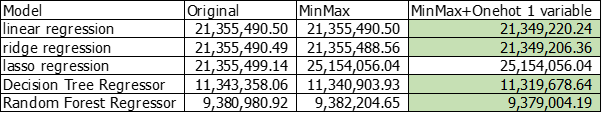


